<h1><em>-:KNN algorithm:-</em></h1>
<h3>   The elongation of KNN is K-Nearest Neighbors, which is one of the Classification algorithm used for Supervised Learning.</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import pandas as pd
from sklearn import preprocessing
%matplotlib inline


In [3]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv


--2020-08-16 09:14:02--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

100%[======================================>] 37,048      --.-K/s   in 0.07s   

2020-08-16 09:14:03 (484 KB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



In [5]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [6]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36f3bd0198>,
      dtype=object)

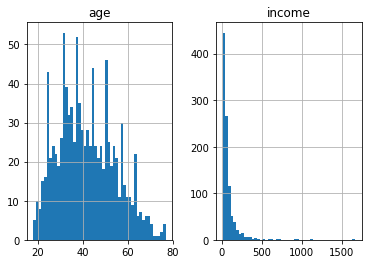

In [11]:
df.hist(column=['income', 'age'], bins=50)

In [12]:
# To get column names list:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

<hr>
<i>
<b>NOTE:</b><br> 
As the above list is in the pandas format, cannot be used directly wth scikit-learn library. 
We have to convert pandas data frame to numpy arrays:
</i> 
<hr>

In [14]:
# Defining our Feature sets(X):
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values
X[0:2]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.]])

In [15]:
# Defining our labels(y):
y = df['custcat'].values
y[0:2]

array([1, 4])

In [17]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:2]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158]])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [20]:
from sklearn.neighbors import KNeighborsClassifier

k = 4
# Train model:
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [21]:
# Making Prediction for an unseen data:
yhat = neigh.predict(X_test)
yhat[0:3]

array([1, 1, 3])

In [22]:
from sklearn import metrics
print('Train set Acccuracy: ', metrics.accuracy_score(y_train, neigh.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yhat))

Train set Acccuracy:  0.5475
Test set Accuracy:  0.32


In [23]:
# Let's have a different value for our k parameter and compare the accuracy with that of the above case where we had taken k=4:
k = 6
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
yhat = neigh.predict(X_test)
print('Train set Accuracy: ', metrics.accuracy_score(y_train, neigh.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31


***
<i><!-- --> Comparing the above results:</i>
<p><b>case 1 :</b> when k = 4, the Test accuracy is 0.32.</p>
<p><b>case 2 :</b> when k = 6, the Test accuracy is 0.31.</p>
<br>
- As our accuracy varies for each value of k, it is very challenging to try and test for different values of k and chosing right value for our model with high accuracy:
<br><br>- Let's calculate the accuracy of KNN for different k's.


In [24]:
ks = 10   # range of k:
mean_accuracy = np.zeros((ks-1))
std_accuracy = np.zeros((ks-1))
Confusion_matrix = []
for n in range(1, ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_accuracy[n-1] = metrics.accuracy_score(y_test, yhat)
    std_accuracy[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_accuracy

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

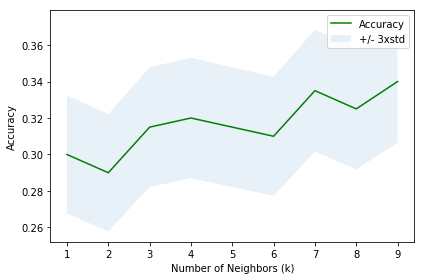

In [25]:
# Plotting model accuracy for different values of k:
plt.plot(range(1, ks), mean_accuracy, 'g')
plt.fill_between(range(1,ks), mean_accuracy - 1 * std_accuracy, mean_accuracy + 1 * std_accuracy, alpha=0.10)
plt.legend(('Accuracy', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.tight_layout()
plt.show()

In [34]:
print('The Best accuracy that we can obtain is', mean_accuracy.max(), 'with k =', mean_accuracy.argmax()+1)

The Best accuracy that we can obtain is 0.34 with k = 9


***
<h2>That's All folks!<br>
See you with another real world example.</h2>